**COVID-19 Trade Impact Data Analysis using Python**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


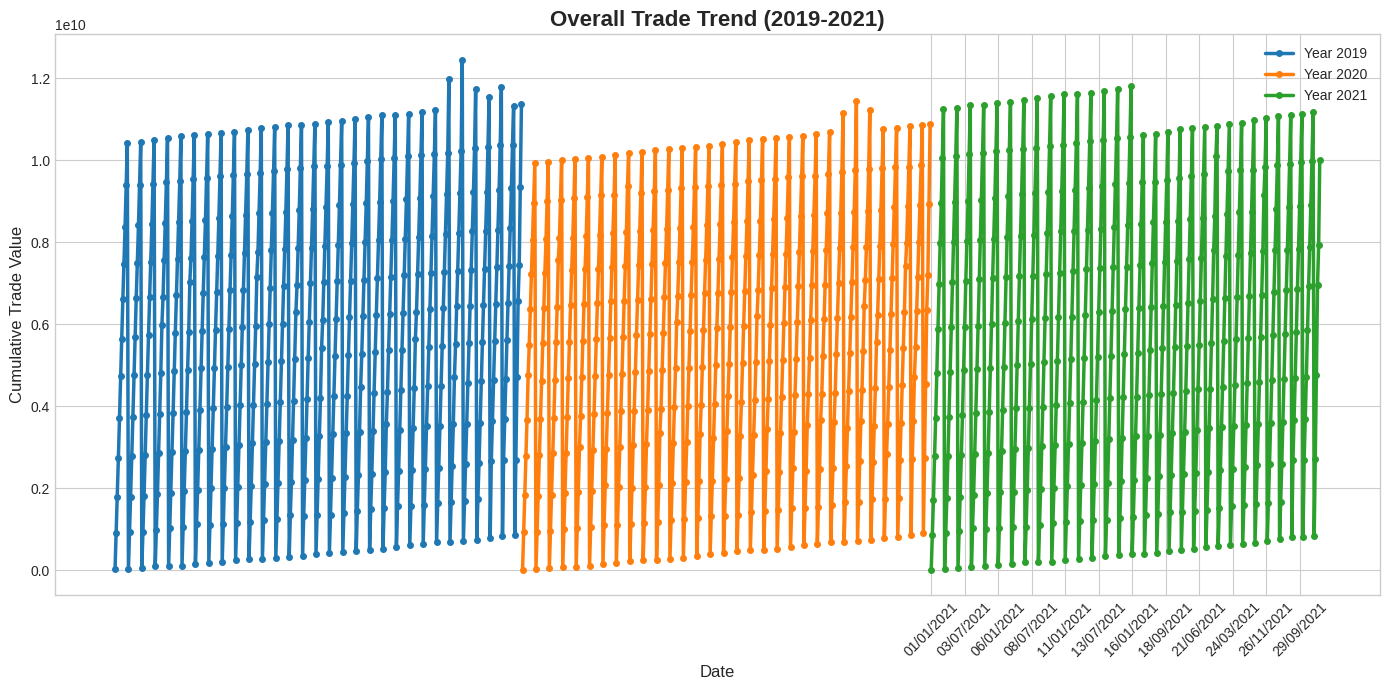

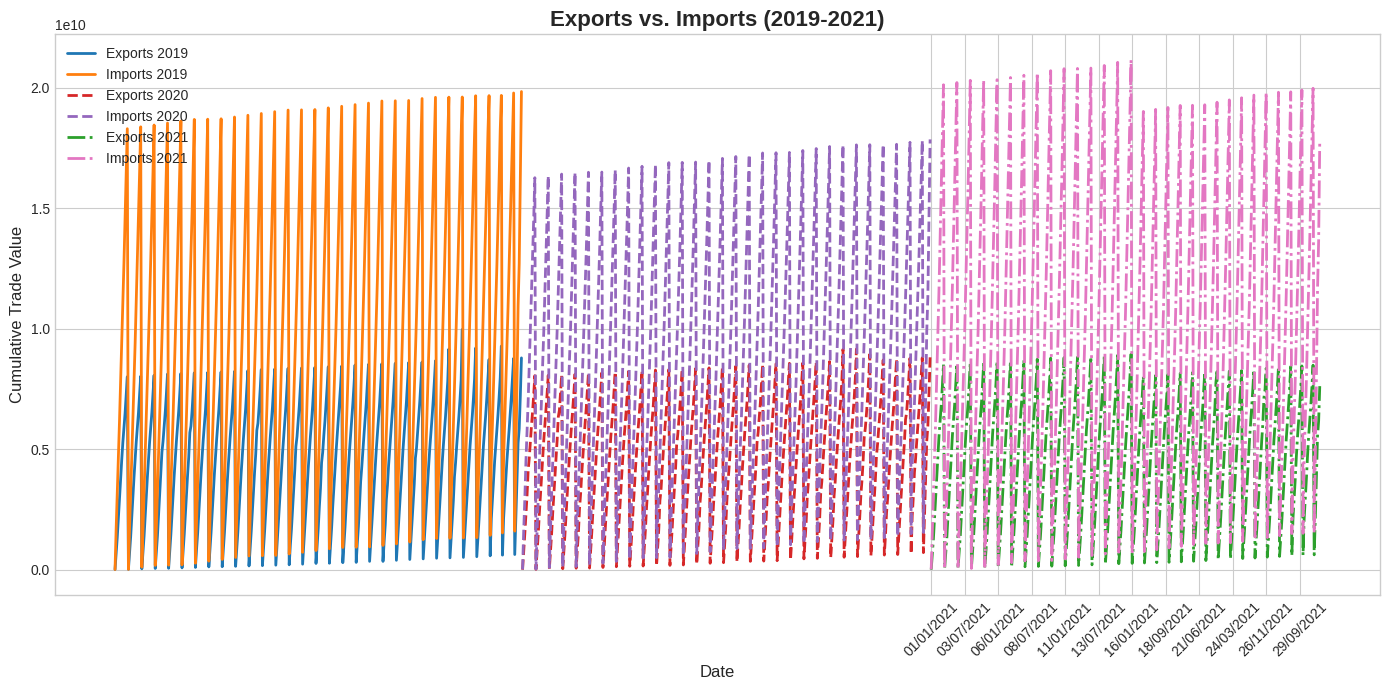

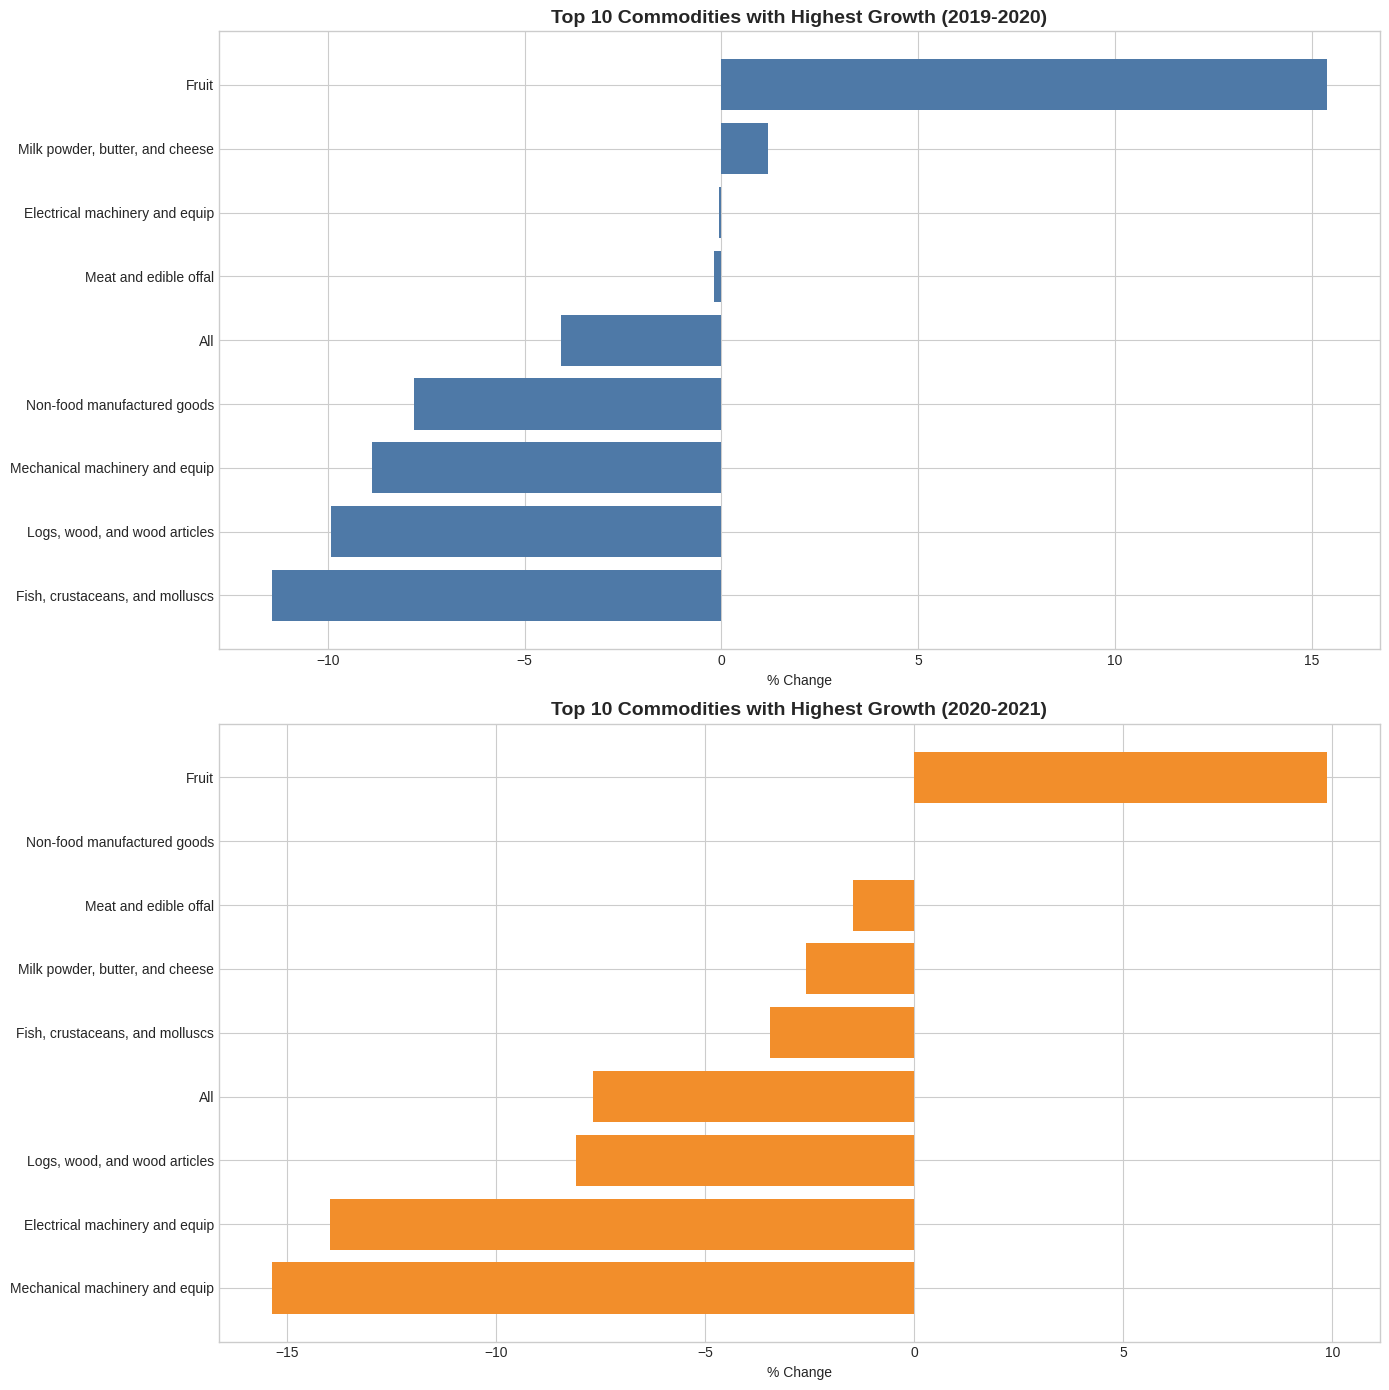

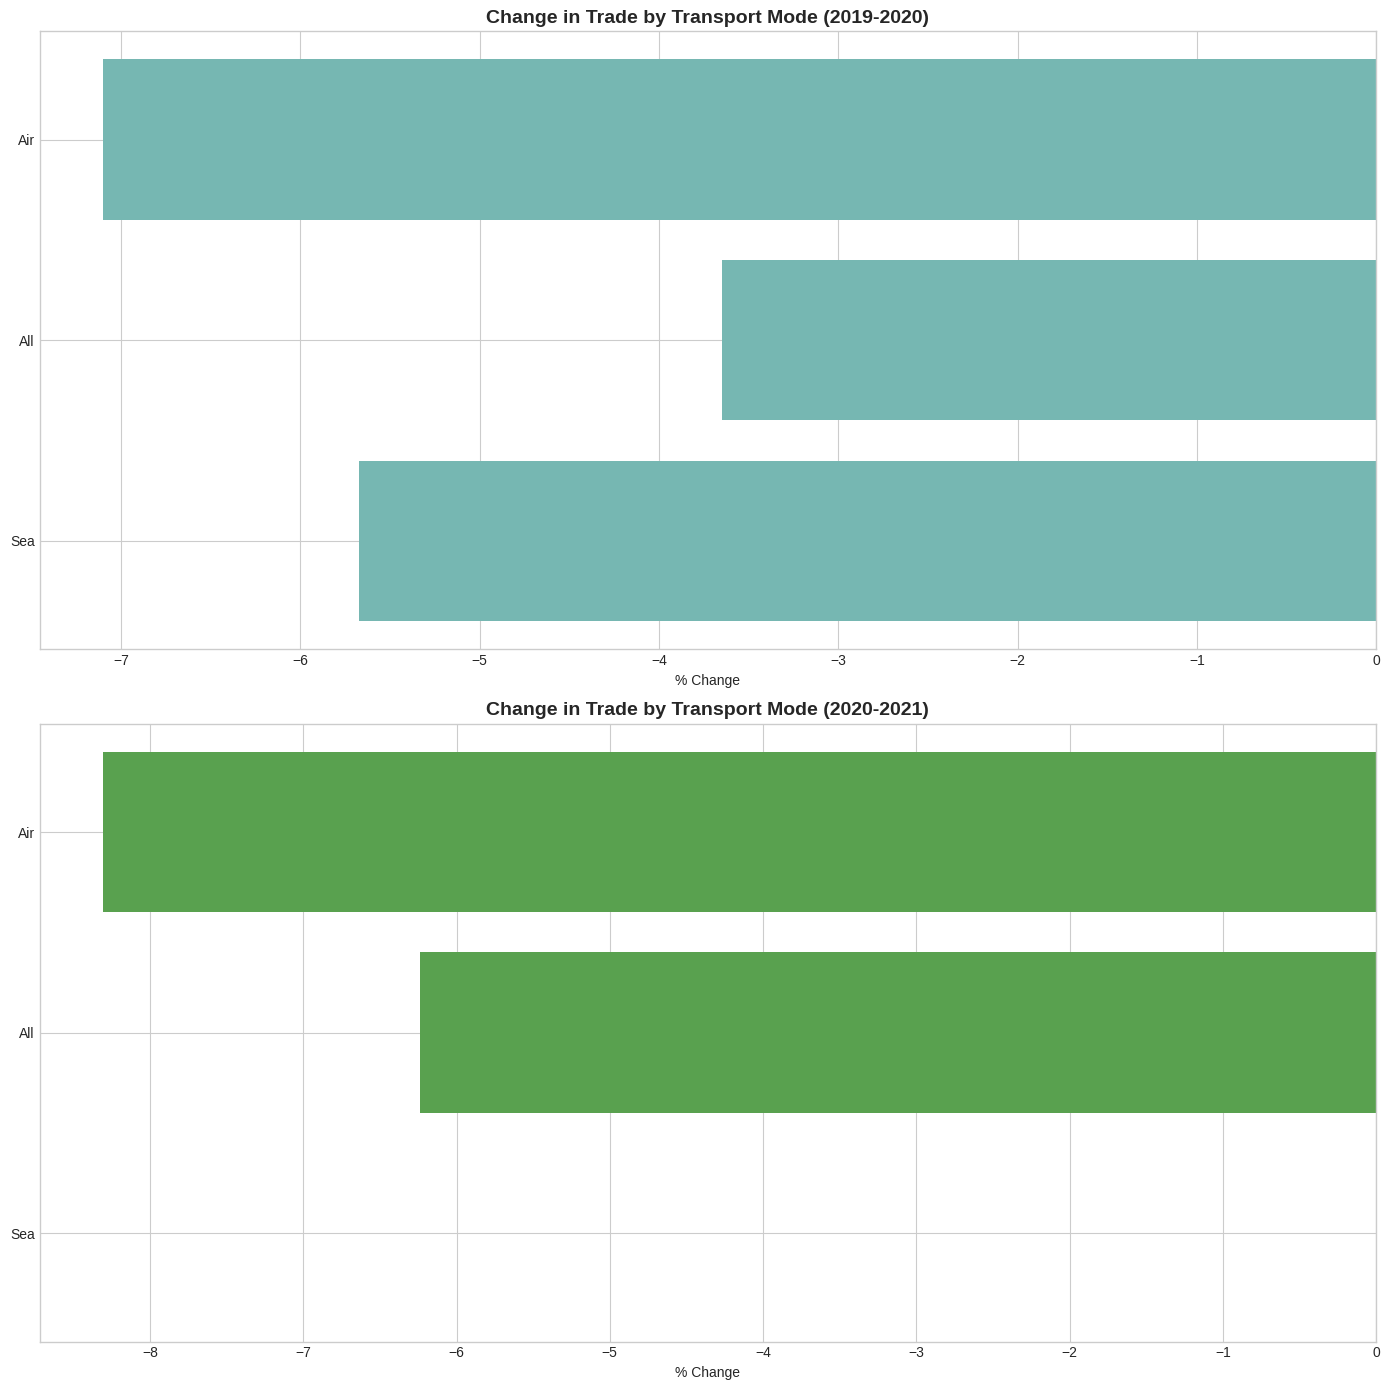

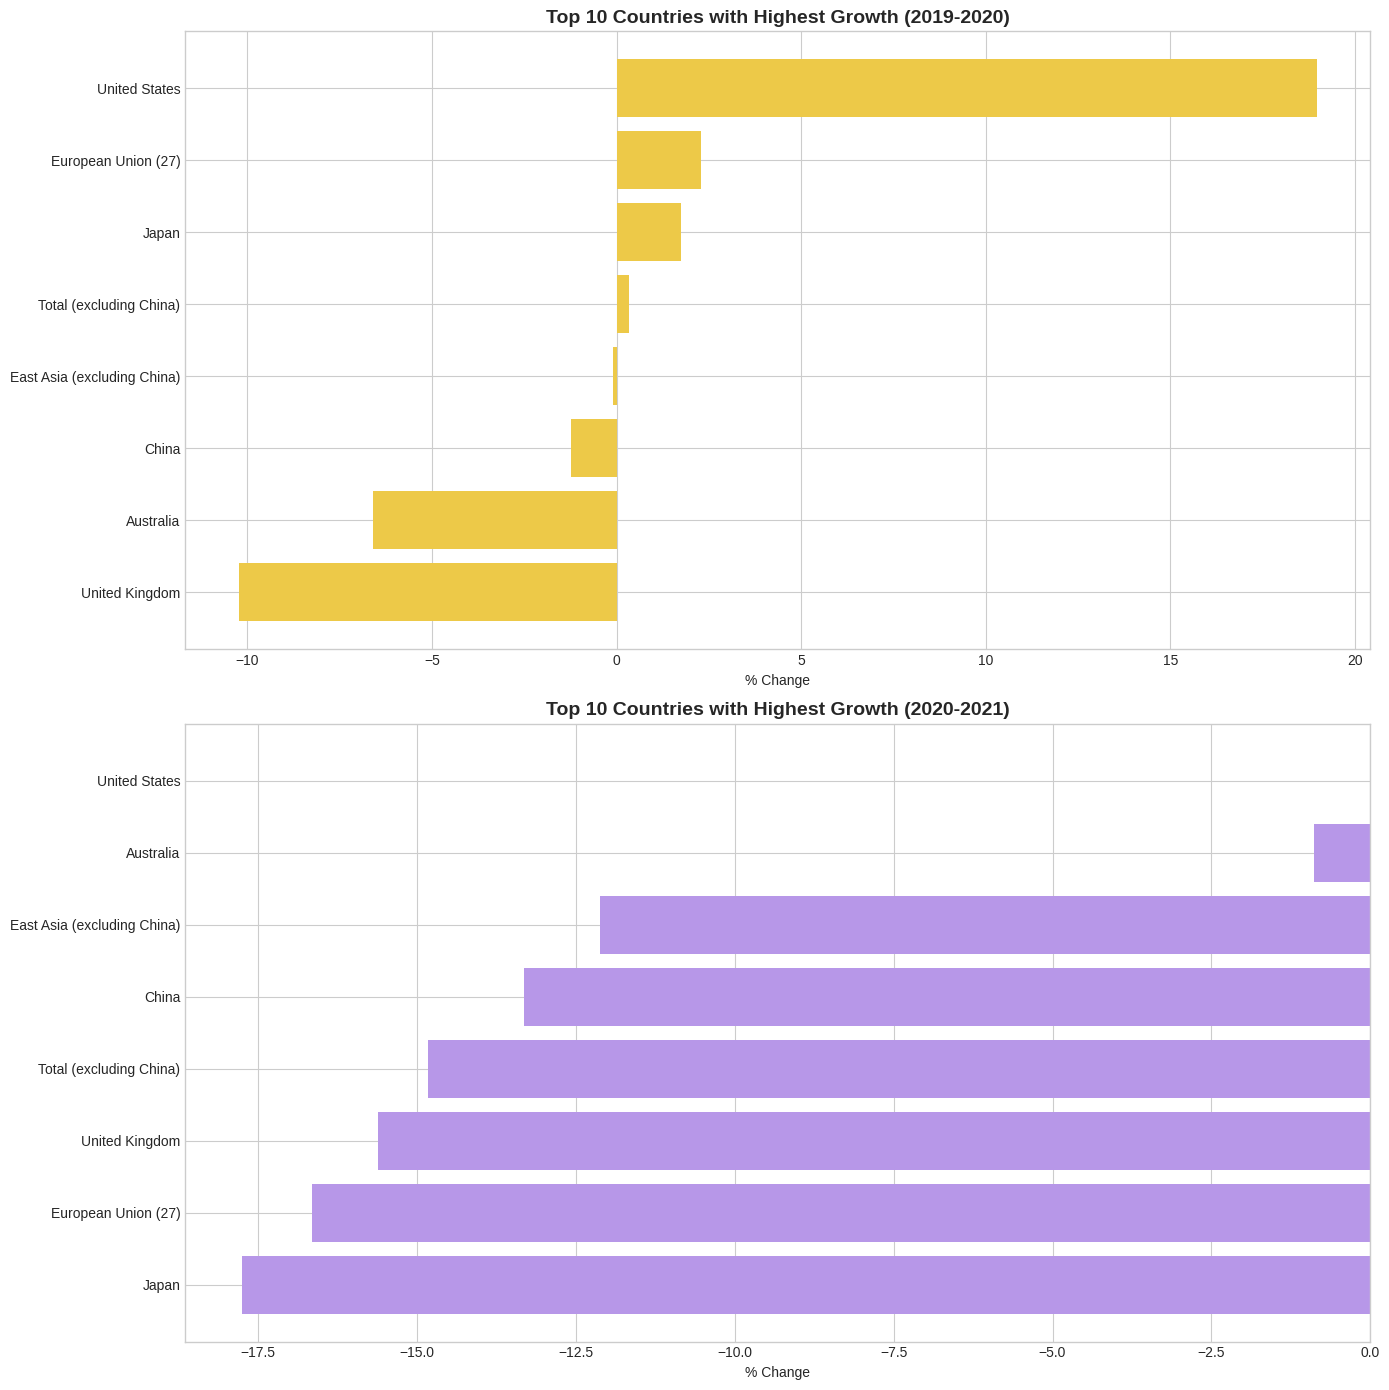

All visualizations have been created and saved to the new 'images' folder in your Google Drive.


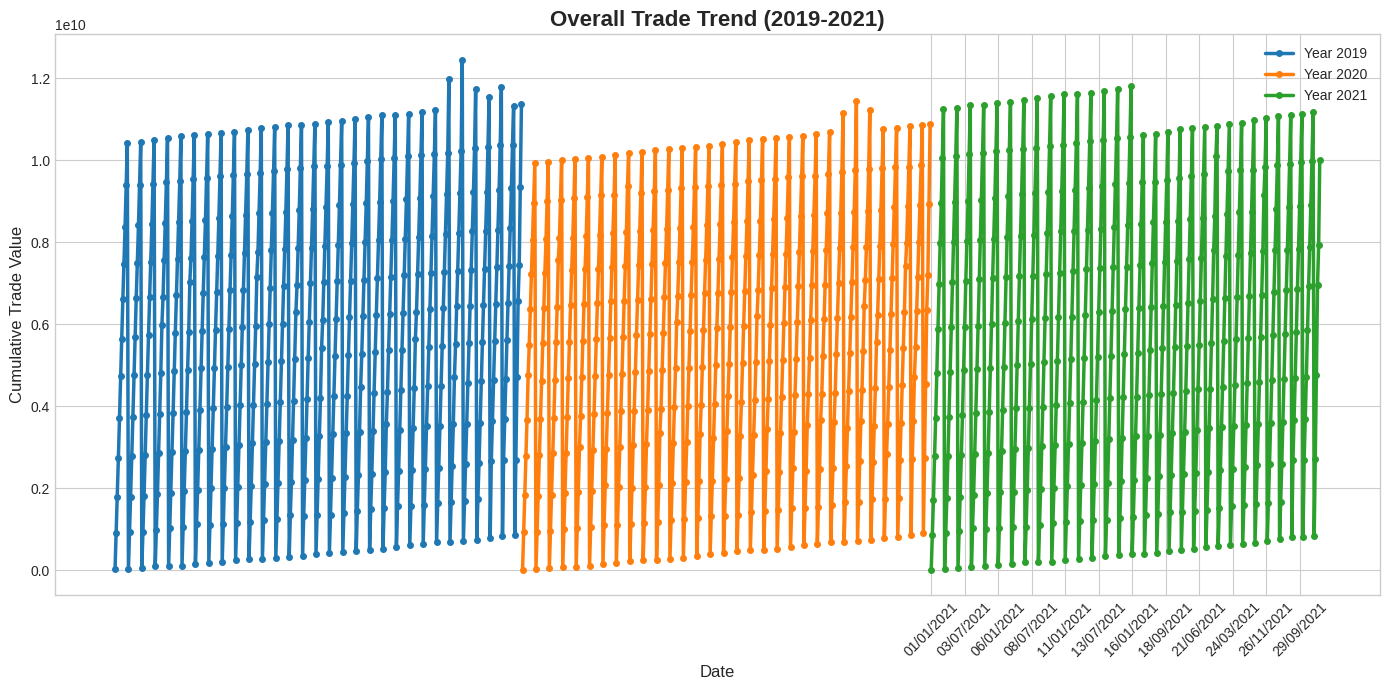

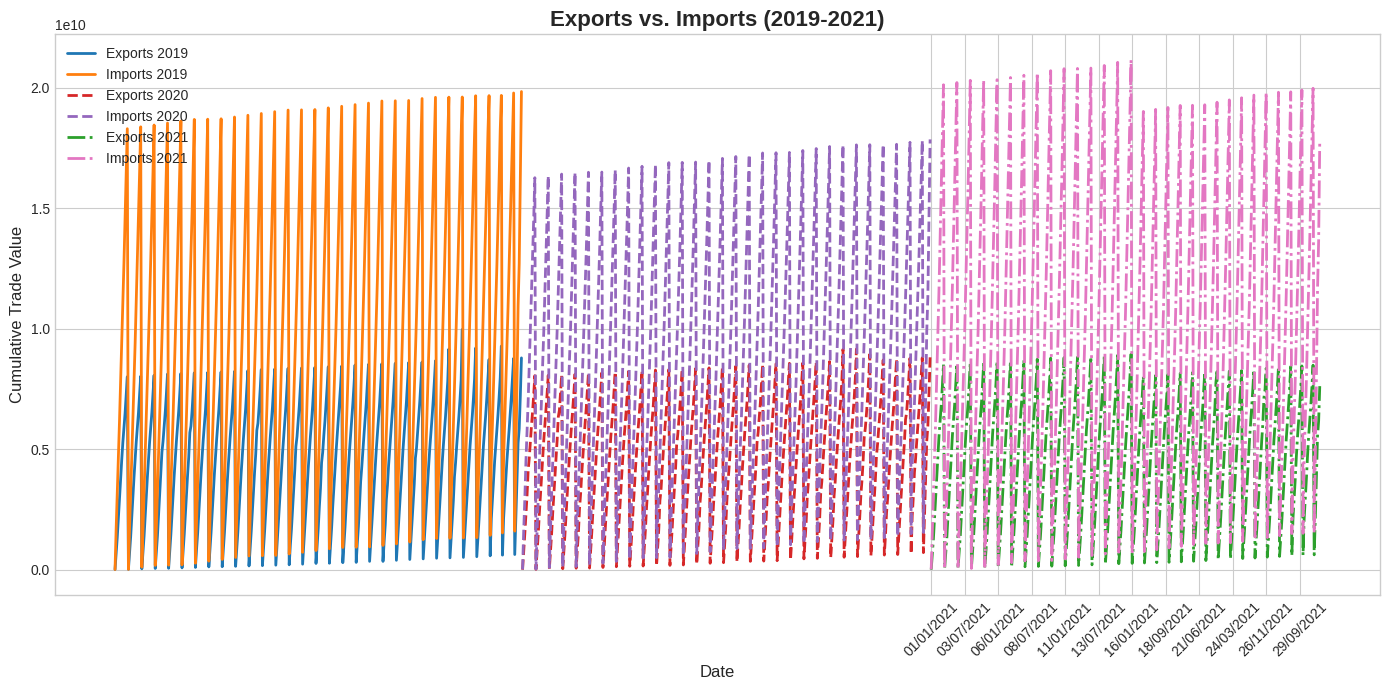

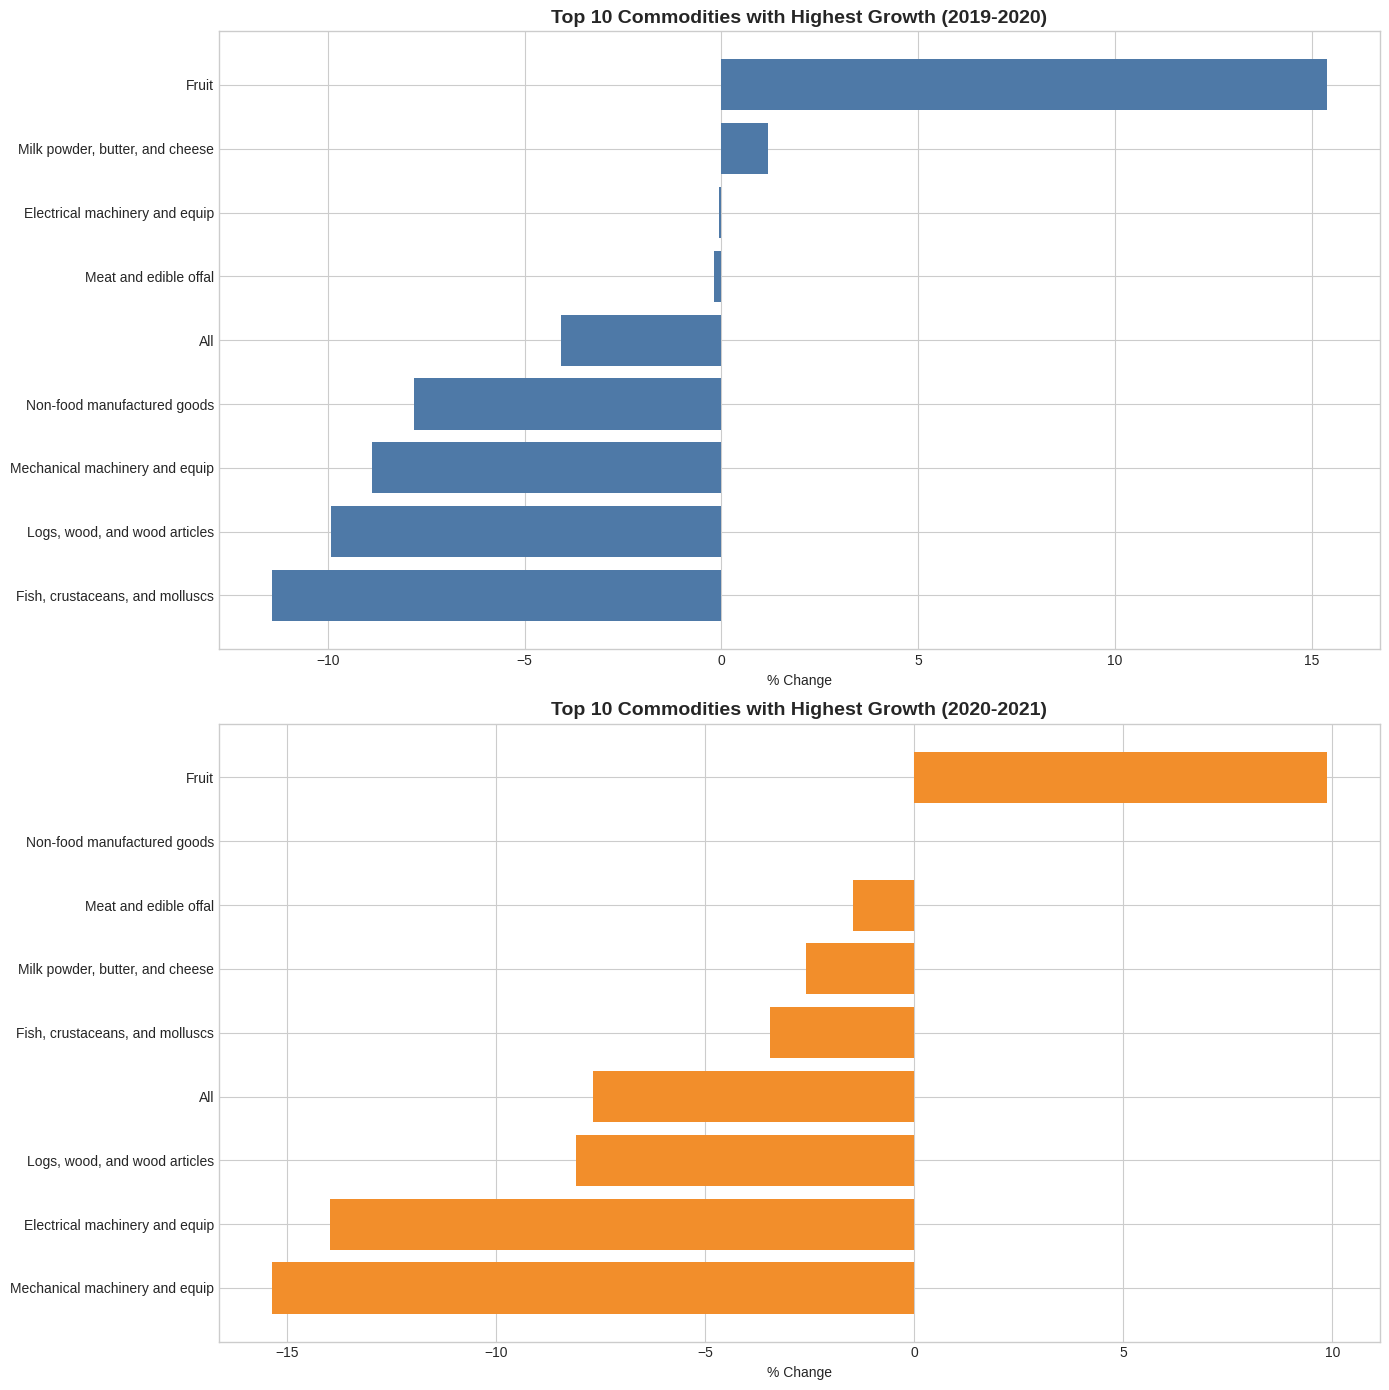

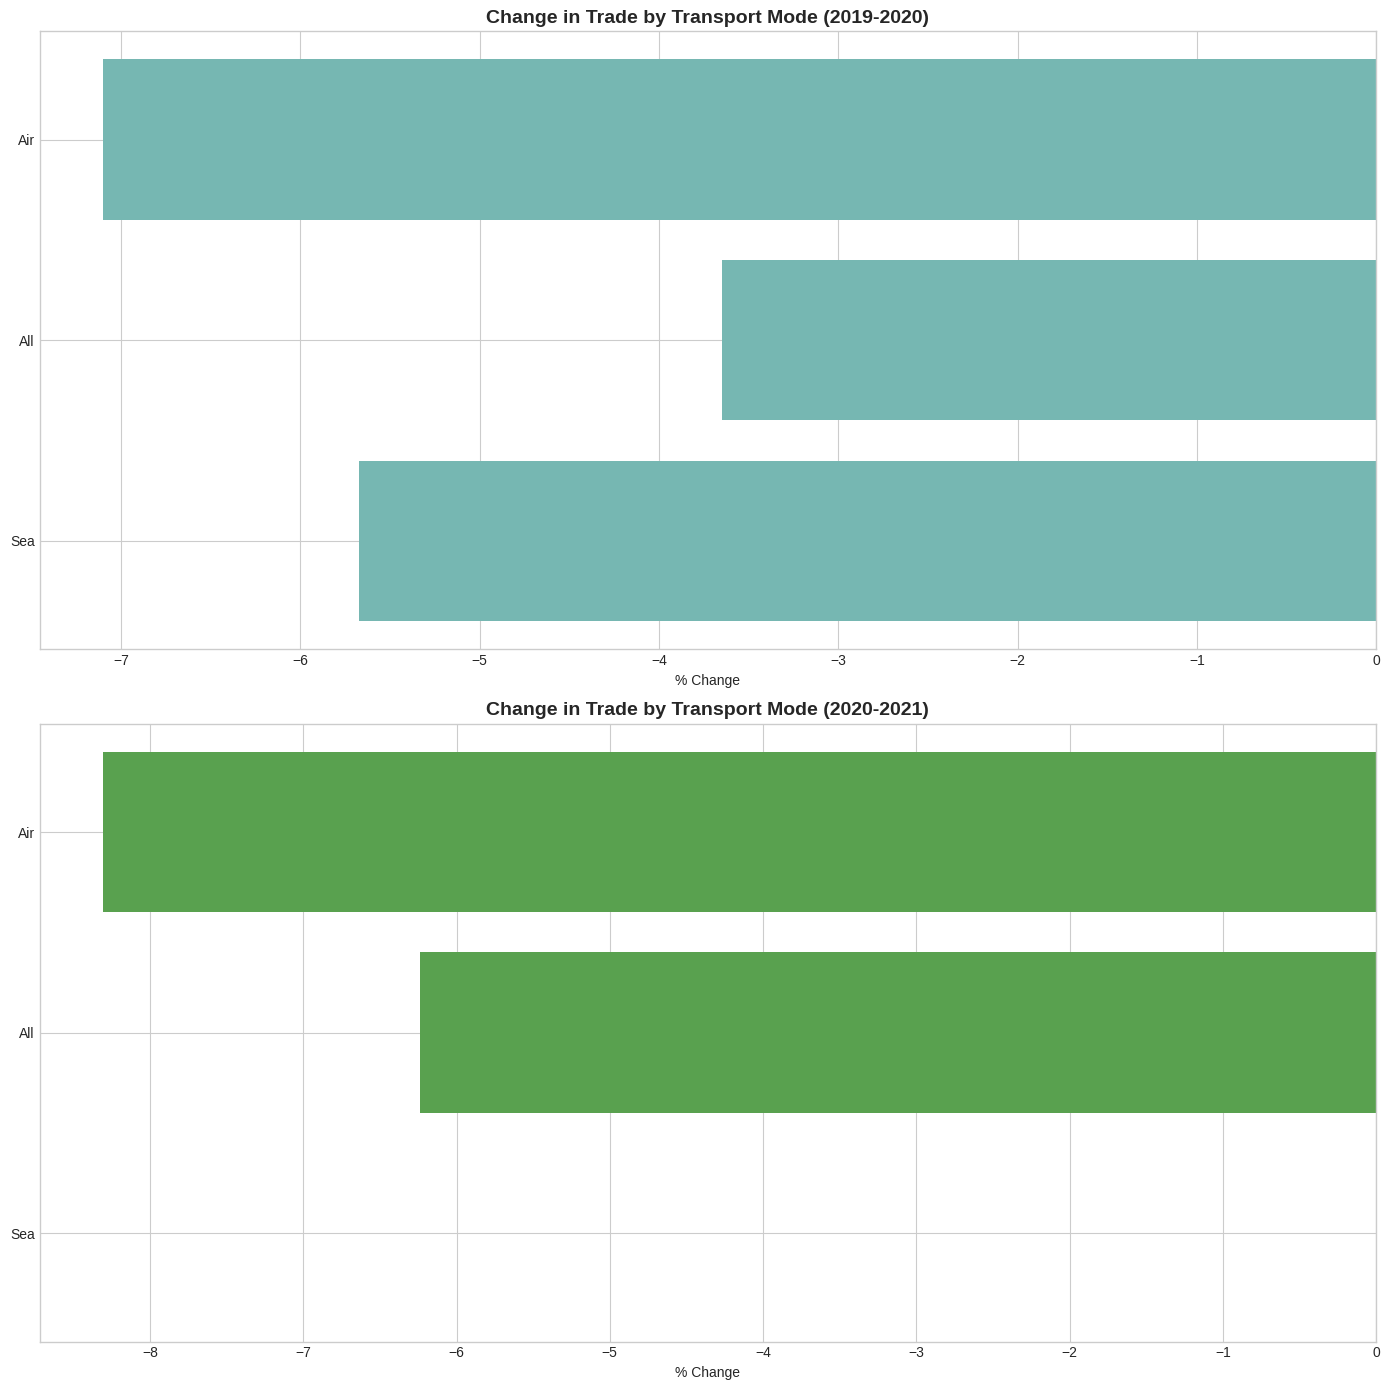

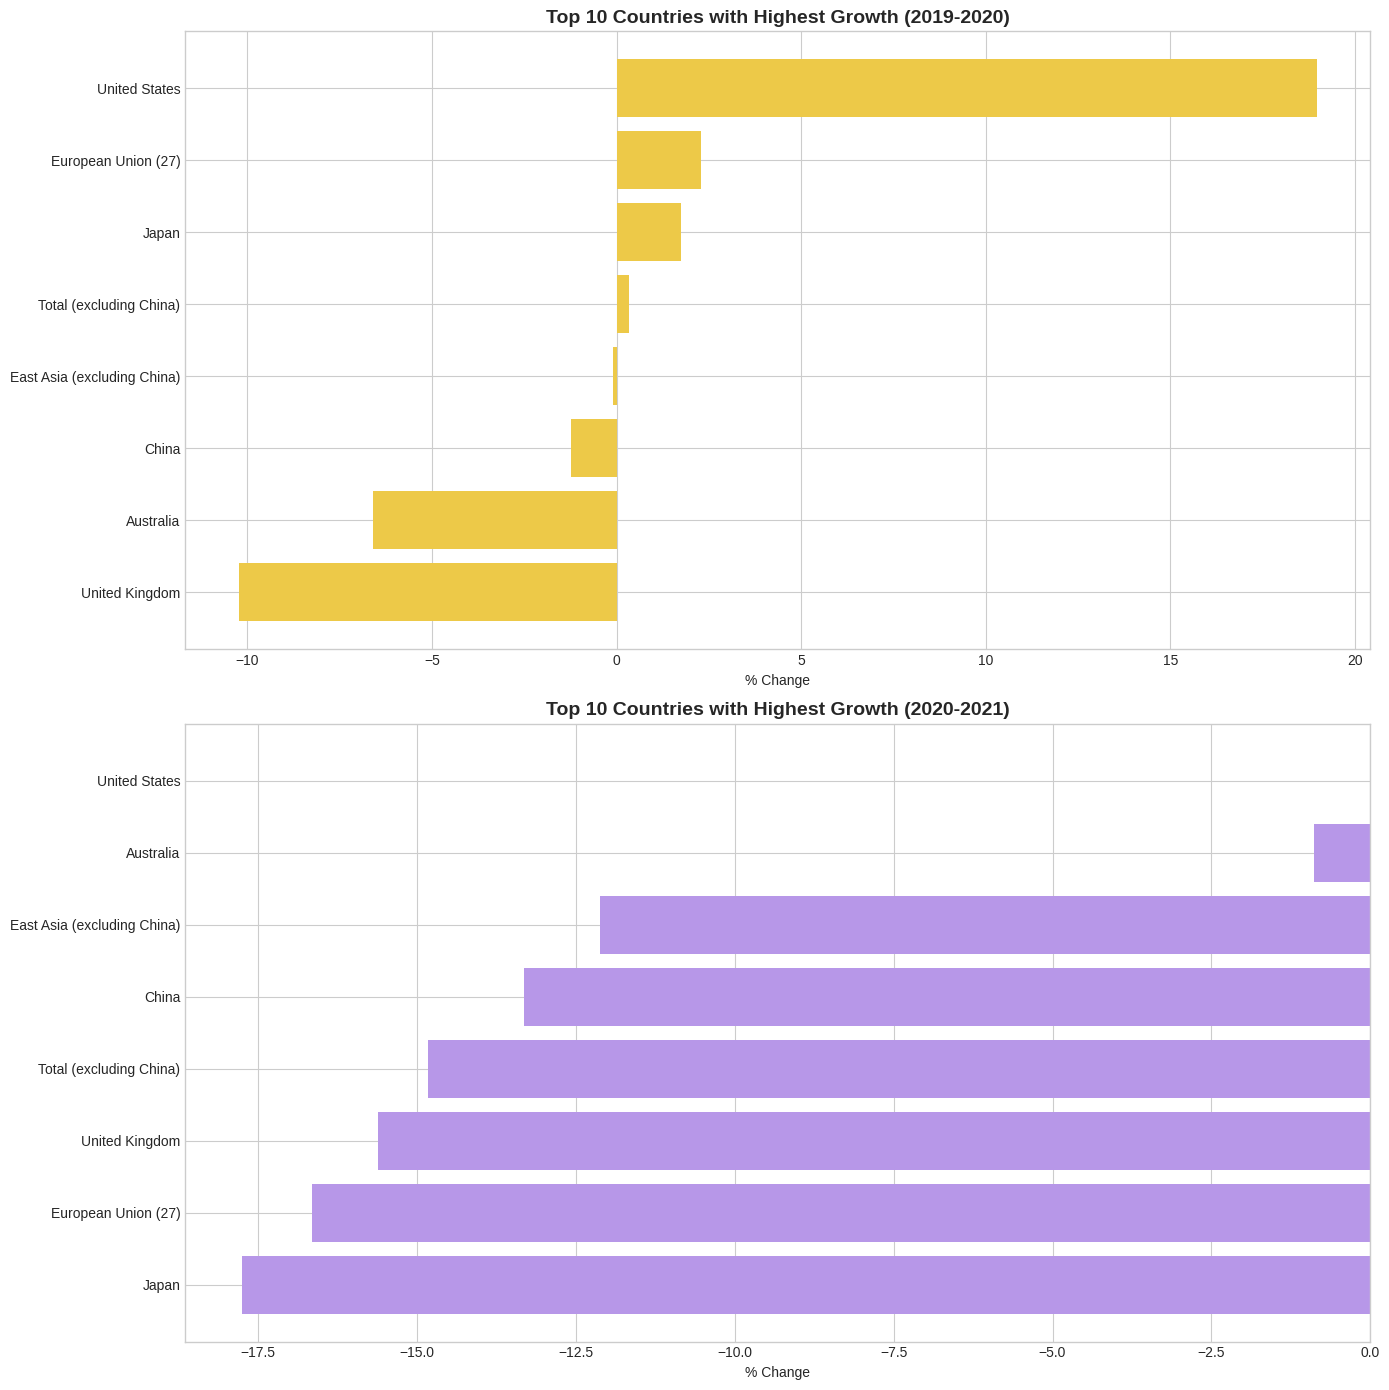

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount("/content/drive")

# Define base directory
base_dir = '/content/drive/My Drive/COVID-19-Trade-Impact-Data-Analysis'

# Create a new directory for images
images_dir = os.path.join(base_dir, 'images')
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
    print(f"Created new directory: {images_dir}")

# Loading The Dataset
pd.set_option('display.max_columns', None)
data = pd.read_csv(os.path.join(base_dir, 'dataset-covid19-trade-impact.csv'))

# Use a professional plotting style for all charts
plt.style.use('seaborn-v0_8-whitegrid')

# Define custom color palettes for consistency
palette_lines = ['#1f77b4', '#ff7f0e', '#2ca02c']
palette_bars = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948', '#b797e8', '#af7aa1', '#ff9da7', '#9c755f']

# --- Overall Trade Trend (2019-2021) ---
data_filtered = data[data['Year'].isin([2019, 2020, 2021])]
grouped_data = data_filtered.groupby(['Year', 'Date'])['Cumulative'].mean().reset_index()

plt.figure(figsize=(14, 7))
for i, year in enumerate([2019, 2020, 2021]):
    yearly_data = grouped_data[grouped_data['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['Cumulative'], label=f'Year {year}', color=palette_lines[i], linewidth=2.5, marker='o', markersize=4, linestyle='-')

plt.title('Overall Trade Trend (2019-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Trade Value', fontsize=12)
plt.xticks(yearly_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- Exports vs. Imports (2019-2021) ---
grouped_direction = data_filtered.groupby(['Year', 'Date', 'Direction'])['Cumulative'].mean().reset_index()

plt.figure(figsize=(14, 7))
export_colors = ['#1f77b4', '#d62728', '#2ca02c']
import_colors = ['#ff7f0e', '#9467bd', '#e377c2']
linestyles = ['-', '--', '-.']

for i, year in enumerate([2019, 2020, 2021]):
    subset_data_exports = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == 'Exports')]
    plt.plot(subset_data_exports['Date'], subset_data_exports['Cumulative'], label=f'Exports {year}', color=export_colors[i], linestyle=linestyles[i], linewidth=2)

    subset_data_imports = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == 'Imports')]
    plt.plot(subset_data_imports['Date'], subset_data_imports['Cumulative'], label=f'Imports {year}', color=import_colors[i], linestyle=linestyles[i], linewidth=2)

plt.title('Exports vs. Imports (2019-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Trade Value', fontsize=12)
plt.xticks(subset_data_imports['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# --- Top Commodities, Transport Modes, and Countries Analysis ---
last_dates = data_filtered.groupby('Year')['Date'].max().values

# --- Commodities Analysis ---
commodity_data = data_filtered[data_filtered['Date'].isin(last_dates)].groupby(['Year', 'Commodity'])['Cumulative'].mean().reset_index()
commodity_data['Change_2019_2020'] = commodity_data.groupby('Commodity')['Cumulative'].pct_change().fillna(0).values
commodity_data['Change_2020_2021'] = commodity_data.groupby('Commodity')['Cumulative'].pct_change().shift(-1).fillna(0).values
top_commodities_2019_2020 = commodity_data[commodity_data['Year'] == 2020].sort_values('Change_2019_2020', ascending=False).head(10)
top_commodities_2020_2021 = commodity_data[commodity_data['Year'] == 2021].sort_values('Change_2020_2021', ascending=False).head(10)

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_commodities_2019_2020['Commodity'], top_commodities_2019_2020['Change_2019_2020']*100, color=palette_bars[0])
ax[0].set_title('Top 10 Commodities with Highest Growth (2019-2020)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_commodities_2020_2021['Commodity'], top_commodities_2020_2021['Change_2020_2021']*100, color=palette_bars[1])
ax[1].set_title('Top 10 Commodities with Highest Growth (2020-2021)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()

# --- Transport Mode Analysis ---
transport_data = data_filtered[data_filtered['Date'].isin(last_dates)].groupby(['Year', 'Transport_Mode'])['Cumulative'].mean().reset_index()
transport_data['Change_2019_2020'] = transport_data.groupby('Transport_Mode')['Cumulative'].pct_change().fillna(0).values
transport_data['Change_2020_2021'] = transport_data.groupby('Transport_Mode')['Cumulative'].pct_change().shift(-1).fillna(0).values

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(transport_data[transport_data['Year'] == 2020]['Transport_Mode'], transport_data[transport_data['Year'] == 2020]['Change_2019_2020']*100, color=palette_bars[3])
ax[0].set_title('Change in Trade by Transport Mode (2019-2020)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(transport_data[transport_data['Year'] == 2021]['Transport_Mode'], transport_data[transport_data['Year'] == 2021]['Change_2020_2021']*100, color=palette_bars[4])
ax[1].set_title('Change in Trade by Transport Mode (2020-2021)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()

# --- Country Analysis ---
country_data = data_filtered[data_filtered['Date'].isin(last_dates) & (data_filtered['Country'] != 'All')].groupby(['Year', 'Country'])['Cumulative'].mean().reset_index()
country_data['Change_2019_2020'] = country_data.groupby('Country')['Cumulative'].pct_change().fillna(0).values
country_data['Change_2020_2021'] = country_data.groupby('Country')['Cumulative'].pct_change().shift(-1).fillna(0).values
top_countries_2019_2020 = country_data[country_data['Year'] == 2020].sort_values('Change_2019_2020', ascending=False).head(10)
top_countries_2020_2021 = country_data[country_data['Year'] == 2021].sort_values('Change_2020_2021', ascending=False).head(10)

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_countries_2019_2020['Country'], top_countries_2019_2020['Change_2019_2020']*100, color=palette_bars[5])
ax[0].set_title('Top 10 Countries with Highest Growth (2019-2020)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_countries_2020_2021['Country'], top_countries_2020_2021['Change_2020_2021']*100, color=palette_bars[6])
ax[1].set_title('Top 10 Countries with Highest Growth (2020-2021)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()

# --- Saving all visualizations to PNG ---
plt.figure(figsize=(14, 7))
for i, year in enumerate([2019, 2020, 2021]):
    yearly_data = grouped_data[grouped_data['Year'] == year]
    plt.plot(yearly_data['Date'], yearly_data['Cumulative'], label=f'Year {year}', color=palette_lines[i], linewidth=2.5, marker='o', markersize=4, linestyle='-')
plt.title('Overall Trade Trend (2019-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Trade Value', fontsize=12)
plt.xticks(yearly_data['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(images_dir, "overall_trade_trend.png"))

plt.figure(figsize=(14, 7))
for i, year in enumerate([2019, 2020, 2021]):
    subset_data_exports = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == 'Exports')]
    plt.plot(subset_data_exports['Date'], subset_data_exports['Cumulative'], label=f'Exports {year}', color=export_colors[i], linestyle=linestyles[i], linewidth=2)

    subset_data_imports = grouped_direction[(grouped_direction['Year'] == year) & (grouped_direction['Direction'] == 'Imports')]
    plt.plot(subset_data_imports['Date'], subset_data_imports['Cumulative'], label=f'Imports {year}', color=import_colors[i], linestyle=linestyles[i], linewidth=2)
plt.title('Exports vs. Imports (2019-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Trade Value', fontsize=12)
plt.xticks(subset_data_imports['Date'][::30], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(images_dir, "exports_vs_imports.png"))

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_commodities_2019_2020['Commodity'], top_commodities_2019_2020['Change_2019_2020']*100, color=palette_bars[0])
ax[0].set_title('Top 10 Commodities with Highest Growth (2019-2020)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_commodities_2020_2021['Commodity'], top_commodities_2020_2021['Change_2020_2021']*100, color=palette_bars[1])
ax[1].set_title('Top 10 Commodities with Highest Growth (2020-2021)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(images_dir, "top_commodities_affected.png"))

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(transport_data[transport_data['Year'] == 2020]['Transport_Mode'], transport_data[transport_data['Year'] == 2020]['Change_2019_2020']*100, color=palette_bars[3])
ax[0].set_title('Change in Trade by Transport Mode (2019-2020)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(transport_data[transport_data['Year'] == 2021]['Transport_Mode'], transport_data[transport_data['Year'] == 2021]['Change_2020_2021']*100, color=palette_bars[4])
ax[1].set_title('Change in Trade by Transport Mode (2020-2021)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(images_dir, "transport_mode_analysis.png"))

fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].barh(top_countries_2019_2020['Country'], top_countries_2019_2020['Change_2019_2020']*100, color=palette_bars[5])
ax[0].set_title('Top 10 Countries with Highest Growth (2019-2020)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('% Change')
ax[0].invert_yaxis()
ax[1].barh(top_countries_2020_2021['Country'], top_countries_2020_2021['Change_2020_2021']*100, color=palette_bars[6])
ax[1].set_title('Top 10 Countries with Highest Growth (2020-2021)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('% Change')
ax[1].invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(images_dir, "country_analysis.png"))

print(f"All visualizations have been created and saved to the new 'images' folder in your Google Drive.")

**YESWANTH CHELLUBOINA**
contact:
**yeswanthchelluboina72@gmail.com**
**https://www.linkedin.com/in/yeswanthchelluboina/**